In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import brute

# Speed as a function of $\gamma$  and f

In [3]:
def Characteristic(k1,k2,g,gamma,deltax):
    k=complex(k1,k2)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    img= out.imag
    return real,img

In [4]:
# Finds the imaginary part of the pure immaginary solution for gamma=0
#Real part zero on imaginary axis
g=2
gamma=0
deltax=0

def Projection1(k,g,gamma,deltax):
    k=complex(0,k)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    return real

FixedSparsity=fsolve(Projection1,1,args=(g,gamma,deltax))

#projected on the axis img=fixed sparsity
def RealProjection2(k,FixedImg,g,gamma,deltax):
    k=complex(k,FixedImg)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    return real

def ImgProjection2(k,FixedImg,g,gamma,deltax):
    k=complex(k,FixedImg)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    img= out.imag
    return img

def ObjectiveFunc(x,FixedImg,g,gamma):
    kr=x[0]
    deltax=x[1]
    return pow(ImgProjection2(kr,FixedImg,g,gamma,deltax),2)+pow(RealProjection2(kr,FixedImg,g,gamma,deltax),2)

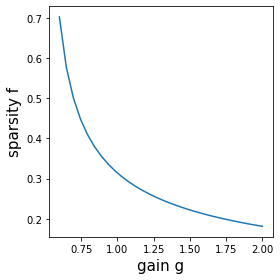

In [5]:
figure(figsize=(4,4))
gs=linspace(0.6,2.,30)
fs=np.zeros(len(gs))
L=10 # arbitrary value of environment lenght

gammas=linspace(0.1,3,20)
krs=zeros((len(gs),len(gammas)))
deltaxs=zeros((len(gs),len(gammas)))

for j in range(len(gs)):
    ki=fsolve(Projection1,1,args=(gs[j],0,0))
    R=pi/(2.0*ki)
    fs[j]=2.0*R/L

plot(gs,fs)
xlabel("gain g", fontsize=15)
ylabel("sparsity f", fontsize=15)
tight_layout()
#savefig("f_gain_dependence.svg")

In [6]:
figure(figsize=(6,6))
gs=logspace(log10(0.6),log10(6),10) #linspace(0.7,6,10) 
fs=np.zeros(len(gs))
L=10 # arbitrary value of environment lenght

gammas=linspace(0.1,2,20)
krs=zeros((len(gs),len(gammas)))
deltaxs=zeros((len(gs),len(gammas)))



for j in range(len(gs)):
    ki=fsolve(Projection1,1,args=(gs[j],0,0))
    R=pi/(2.0*ki)
    fs[j]=2.0*R/L
    #print(FixedSparsity)
    for i in range(len(gammas)):
        gamma=gammas[i]
        min_params=brute(ObjectiveFunc,ranges=[(-10,0),(-2,0)],args=(ki,gs[j],gamma))
        krs[j][i]=min_params[0]
        deltaxs[j][i]=abs(min_params[1])
    
    
#ylabel(r"speed (a.u)", fontsize=20)
#xlabel(r"$\gamma$", fontsize=20)
#xscale("log")




<Figure size 432x432 with 0 Axes>

In [7]:
# curvefit with non linear least squares (curve_fit function)
import numpy as np
from scipy.optimize import curve_fit

def func(x,a,b,c,d,e):
    gamma=x[0]
    f=x[1]
    return a*(gamma)*(f)/((b*gamma+c*f+d*gamma*f +e*gamma*(f**2)))


X1, X2 = np.meshgrid(gammas,fs)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))
xdata = np.vstack((x1_1d, x2_1d))

speeds=deltaxs
        

ydata = speeds.reshape(xdata.shape[1])
popt, pcov = curve_fit(func, xdata, ydata)

z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(size)

print("fit parameters:")
print(popt)

fit parameters:
[ 2.66016637  0.32502935  1.31649896 -0.15279076  0.68330379]


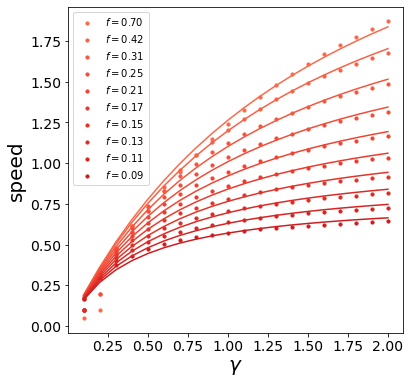

In [8]:
figure(figsize=(6,6))
color=cm.Reds(np.linspace(0.5,1,len(gammas)))
for i in range(len(deltaxs)):
    x=gammas
    y1=deltaxs[i]
    y2=Z_fit[i]
    scatter(gammas,y1,label="$f=$"+"{:.2f}".format(fs[i]),s=10,color=color[i])
    plot(gammas,y2,color=color[i])

xlabel(r"$\gamma$",fontsize=20)
ylabel("speed", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legend()
#savefig("speed_gamma_dependence_analytic.svg")